# From Rogue Data to Discovery: Exploring India's Startup Ecosystem - A data-driven approach  

## Indian Start-Up Funding Analysis

### Project Scenario
The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
  - Analyze funding received by start-ups in India from 2018 to 2021.
  - Separate data for each year of funding will be provided.
  - Find the start-ups’ details, the funding amounts received, and the investors' information.

### Business Understanding: Navigating the Dynamics of the Indian Startup Ecosystem

In today's rapidly evolving business landscape, the Indian startup ecosystem stands as a beacon of innovation, disruption, and growth. According to NASSCOM, India is the third largest startup ecosystem globally with approximately 9300 startups in 2020. The key drivers of the indian startup ecosystem are Venture capitalists, angel investors, and government bodies. Despite the impressiveness of the ecosystem, it still faces several challenges including limited access to capital for early-stage startups. 
The future is promising as there is a recent rise in the number of Indian ‘unicorns’ – startups valued at over $1 billion. This happened in the midst of the pandemic in 2021, while India established a record-breaking 44 unicorns.
To gain more understanding of this dynamic ecosystem, let us delve into the following subsections:

**1. Market Analysis:**
The Indian startup ecosystem spans various sectors, categorized under the Global Industry Classification Standard (GICS). These sectors include Information Technology, Consumer Discretionary, Financials, Healthcare, Industrials, Communication Services, and more. Each sector presents unique opportunities and challenges for startups aiming to disrupt traditional industries and capitalize on emerging trends.

**2. Competitor Analysis:**
Major players in the Indian startup ecosystem operate across diverse sectors, leveraging technology, innovation, and customer-centric approaches to gain a competitive edge. From e-commerce giants like Flipkart and Snapdeal to fintech disruptors like Paytm and PhonePe, startups in India are redefining consumer experiences, reshaping industries, and driving digital transformation.

**3. Stakeholder Engagement:**
Effective stakeholder engagement is essential for startups to forge strategic partnerships, access funding, and navigate regulatory landscapes. Engaging with investors, industry associations, government agencies, academic institutions, and consumers helps startups gain insights, build networks, and foster collaborations that drive innovation and growth.

The Indian startup ecosystem offers a wealth of opportunities across diverse sectors, as classified under the GICS framework. By synthesizing insights one data-point at a time, stakeholders can gain a nuanced understanding of market dynamics, identify strategic opportunities, and address challenges effectively. With a data-driven approach, collaborative engagement, and strategic foresight, stakeholders can navigate the complexities of the Indian startup ecosystem and drive sustainable growth and innovation in the years to come.

#### References
1. **BYJU'S. (n.d.). Indian Startup Ecosystem [UPSC Notes].** Retrieved from [https://byjus.com/free-ias-prep/startup-ecosystem-in-india/](https://byjus.com/free-ias-prep/startup-ecosystem-in-india/) .

2. **Srivastava, A., & Kumar, A. (2018). A Comprehensive Study of the Indian Startup Ecosystem.** *International Journal of Management and Social Sciences Research, 7*(8), 1-10. Retrieved from [https://www.inspirajournals.com/uploads/Issues/150145809.pdf](https://www.inspirajournals.com/uploads/Issues/150145809.pdf) .

3. **Aspiring Youths. (n.d.). Essay: Startup Ecosystem in India.** Retrieved from [https://aspiringyouths.com/essay/startup-ecosystem-in-india/](https://aspiringyouths.com/essay/startup-ecosystem-in-india/) .

4. **Chakraborty, S., & Chakraborty, S. (2019). The Indian Startup Ecosystem: Drivers, Challenges, and Pillars of Support.** *Observer Research Foundation Occasional Paper, 210*. Retrieved from [https://www.orfonline.org/wp-content/uploads/2019/09/ORF_Occasional_Paper_210_Startups.pdf](https://www.orfonline.org/wp-content/uploads/2019/09/ORF_Occasional_Paper_210_Startups.pdf) .

5. S&P Dow Jones Indices and MSCI. (2023). GICS® - Global Industry Classification Standard. Retrieved from MSCI2 [https://www.msci.com/our-solutions/indexes/gics](https://www.msci.com/our-solutions/indexes/gics).



#### Objective
To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations revelevant to stakeholders, investors and the team's venture.


#### Hypothesis Testing
1. The amount of funding a startup receives is based on its sector.<br>
***Null hypothesis (Ho):*** *The amount of funding a startup receives is not influenced by its sector.*<br>
**Alternate hypothesis (Ha):** *The amount of funding a startup receives is influenced by its sector.*

2. Startups with headquarter in india's silicon valley- Bengaluru receive more funding.<br>
***Null Hypothesis(Ho):*** *There is no siginificant difference in the amount of funding received by startups with headquarter in Bangaluru compared to startups in other areas.*<br>
***Alternative Hypothesis(Ha):*** *There is a siginificant difference in the amount of funding received by startups with headquarter in Bangaluru compared to startups in other areas.*

#### Business Questions

1. What sectors have shown the highest growth in terms of funding received over the past four years?

2. What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3. Are there any notable differences in funding patterns between early-stage startups and more established companies?

4. What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

5. Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

6. Which investors have more impact on startups over the years?

7. What impact did the COVID-19 pandemic have on startup funding in the year 2020?

8. How are indian startups distributed by stages and funding?

9. Are there unicorns, if yes, how many?



## Data Understanding

- Doing necessary installations

In [ ]:
# Install necessary packages in quiet mode

%pip install --quiet numpy pandas pyodbc python-dotenv requests nltk scikit-learn  

- Import needed libraries

In [115]:
# Environmental variables
from dotenv import dotenv_values 

# Microsoft Open Database Connectivity (ODBC) library
import pyodbc 

# Data handling
import numpy as np
import pandas as pd 

# Regular expression                   
import re                      

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Statistical tests
import statistics as stat 
from scipy import stats 

# Set pandas to display all columns
pd.set_option("display.max_columns", None)

# Suppress the scientific notation
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Disable warnings               
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


#### First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
Two tables were read from the databases. That is, <br>
Table 1: dbo.LP1_startup_funding2020 <br>
Table 2: dbo.LP1_startup_funding2021


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete.
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
query = "Select * from dbo.LP1_startup_funding2020"
table_1 = pd.read_sql(query, connection)


In [6]:
query = "Select * from dbo.LP1_startup_funding2021"
table_2 = pd.read_sql(query, connection)

In [7]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [8]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [9]:
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [10]:
table_1[table_1['column10'].notna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


- Drop column10 in table_1 since it has just two values that are not null and are also just repetition of values in Stage column 

In [11]:
# Drop column10
table_1.drop('column10', axis=1, inplace=True) if 'column10' in table_1.columns else table_1
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [12]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [13]:
# Clean the column names
table_1 = clean_column_names(table_1)
table_2 = clean_column_names(table_2)

In [14]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   what_it_does   1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [15]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1208 non-null   object 
 3   sector         1209 non-null   object 
 4   what_it_does   1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1147 non-null   object 
 7   amount         1206 non-null   object 
 8   stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


- Create year column to identify each dataset

In [16]:
# Table 1: dbo.LP1_startup_funding2020
table_1['year'] = 2020

# Table 2: dbo.LP1_startup_funding2021
table_2['year'] = 2021

#### First Data Set



In [17]:
# First Data set
first_dataset = pd.concat([table_1, table_2], ignore_index=True)

first_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2264 non-null   object 
 1   founded        2050 non-null   float64
 2   headquarter    2169 non-null   object 
 3   sector         2251 non-null   object 
 4   what_it_does   2264 non-null   object 
 5   founders       2248 non-null   object 
 6   investor       2164 non-null   object 
 7   amount         2007 non-null   object 
 8   stage          1372 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


#### Second Data Set

In [18]:
# Load dataset
second_dataset = pd.read_csv('datasets/individual_csv/startup_funding2019.csv')

second_dataset = clean_column_names(second_dataset)

second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


#### Third Data Set

In [19]:
# Load dataset
third_dataset = pd.read_csv('datasets/individual_csv/startup_funding2018.csv')

third_dataset = clean_column_names(third_dataset)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_name   526 non-null    object
 1   industry       526 non-null    object
 2   round_series   526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   about_company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [20]:
# Rename round_series to stage and location to headquarter
third_dataset.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   what_it_does   526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


- Create Year column to identify each dataset


In [21]:
# Create year column

# The second data is a flat-file name startup_funding2019.csv
second_dataset['year'] = 2019

# The third part of the data flat-file named startup_funding2018.csv
third_dataset['year']  = 2018

- Create the final concatenated dataset

In [22]:
# Final Data set
final_dataset = pd.concat([first_dataset, second_dataset, third_dataset], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


### CLEANING: Navigating the rogue data- The path of a janitor

### General cleaning

- Drop duplicated from final dataset


In [23]:
# Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

- Replace 'None', empty or '—' string values with NaN element-wise allowing for consistent representation of missing values

In [24]:
# Function replace None with Numpy NaN
def replace_none(value):
    like_nan = {'none', 'nan', '—', ''}
    if isinstance(value, str) and (value.lower().strip() in like_nan):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise

### Columns cleaning

- Headquarter- sanitize by swapping misplaced values
    - To allow consistent headquarter values, take every word before the first comma as headquarter
    - If headquarter value has '&', then the correct value for headquarter is the sector value and sector value becomes the old headquarter value. 
    - Fixes index 1296 and 2231 e.g. 'Food & Beverages' a sector was misplaced in headquarter while the value 'Hauz Khas'- a neighbourhood in south Delhi was misplaced in sector column

In [25]:
# Fix headquarter values, take every word before the first comma as headquarter
def splitter(value):
    """
    Splits a string by comma and returns the first part.
    
    Args:
        value (str or None): The value to be split.
        
    Returns:
        str or None: The first part of the string before the first comma, or value if the input is not of type str.
    """
    return value.split(',')[0] if isinstance(value, str) else value

final_dataset['headquarter'] = [splitter(hq) for hq in final_dataset['headquarter']]


In [26]:
# Sanitisizing the headquarter column by swapping misplaced values
mask = final_dataset['headquarter'].apply(lambda x: '&' in str(x))

# Fill missing values in mask with False
mask.fillna(False, inplace=True)

# Store old headquarter misplaced values for swapping
old_headquarter = final_dataset.loc[mask, 'headquarter']

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to the old headquarter value 
final_dataset.loc[mask, 'sector'] = old_headquarter

- Headquarter & Sector column- more cleaning
    - If column value contains '#REF!', clean it and shift the row starting from that column by 1 step and until the stage column
    - Sanitize sector column if after cleaning and shifting, but the sector value is also present among unique values of the headquarter column
    - Fixes index 1297, 1312, 2155

In [27]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['headquarter', 'investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = final_dataset[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    final_dataset.loc[mask, column] = final_dataset.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
    final_dataset.loc[mask, column:'stage'] = final_dataset.loc[mask, column:'stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = final_dataset['sector'].apply(lambda x: x in final_dataset['headquarter'].unique())

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to NaN
final_dataset.loc[mask, 'sector'] = np.nan          

- Headquarter column- more cleaning using corrections

In [28]:
def clean_with_corrections(df, column_name, corrections):
    """
    Make corrections in a given column of text data based on a dictionary of corrections.

    Parameters:
    - df (DataFrame): A pandas DataFrame containing the data.
    - column_name (str): The name of the column in the DataFrame to correct.
    - corrections (dict): A dictionary where keys are misspelled words and values are their correct forms.

    Returns:
    - DataFrame: The DataFrame with corrected values in the specified column.

    Example:
    corrections = {
         'Bangaldesh': 'Bangladesh',
         'Banglore': 'Bangalore',
    }
    
    clean_with_corrections(df, 'headquarter', corrections)
    """
    
    # Create a regex pattern to match any of the corrections keys and ignore case
    pattern = re.compile(r'\b(?:' + '|'.join(corrections.keys()) + r')\b', re.IGNORECASE)

    # Replace misspelled locations with corrections using regex. 
    # If the word (m) exists, the correction is returned else the word (m) is returned
    df[column_name] = df[column_name].str.replace(pattern, lambda m: corrections.get(m.group(0), m.group(0)), regex=True) # Entire match, m.group(0)
    
    return df




- Most locations were converted to cities where possible
- For cities with alternate names, the most recent name was chosen e.g. Bengaluru is the more recent official name for Bangalore. So is Gurugram for Gurgaon.
- Names that were not cities were replaced with missing value

In [29]:
# Define the corrections dictionary for headquarter column
corrections = {
    'Bangaldesh': 'Bangladesh',
    'Hyderebad': 'Hyderabad',
    'Banglore': 'Bengaluru',
    'Ahmadabad': 'Ahmedabad',
    'San Franciscao': 'San Francisco',
    'San Francisco Bay Area': 'San Francisco',
    'Samsitpur': 'Samastipur',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Santra': 'Satara',
    'Uttar pradesh': 'Uttar Pradesh',
    'Kormangala': 'Koramangala',
    'Margão': 'Margao',
    'Bangalore City': 'Bengaluru',
    'Bangalore': 'Bengaluru',
    'Rajastan': 'Rajasthan',
    'New Delhi': 'Delhi',
    'Gurgaon': 'Gurugram',
    'Computer Games': None
}

# Apply the correction function to headquarter column
final_dataset = clean_with_corrections(final_dataset, 'headquarter', corrections)

In [30]:
final_dataset['headquarter'].unique()

array(['Chennai', 'Bengaluru', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', None, 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'Bangladesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Trivandrum', 'Cochin', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Rajasthan', 'Kochi', 'Ludhiana', 'Dehradun', 'Tangerang',
       'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'Bangkok', 'Kanpur',
       'Chandigarh', 'Warangal', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal', 'Coimbatore', 'Small Towns',
       'Rajsamand', 'Ranchi', 'Faridabad', '', 'Vadodara', 'Hauz Khas',
       'Mohali', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Lucknow',
       'Telan

- Sector column cleaning:
    - Identify  'sector' values that are not supposed to be sector values have character length well over the median sector length 
    - Split group sector values by comma and search within the unique values of single sector values. If found, the sector is the result, if not found, the sector is the first value of the split. e.g. for a given group sector value "EdTech, Education, Enterprise Software, Peer to Peer" each member is checked against the single list of sectors. Since EdTech is found in the single list of sectors, the group of sector keywords become just Edtech to reduce redundancy and allow for consistency
    

In [31]:
# View the dirty sector column
final_dataset['sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [32]:
print(f'Before cleaning, there are {final_dataset.sector.nunique()} unique sectors')

Before cleaning, there are 867 unique sectors


In [33]:
def count_comma(value):
    """Finds all comma in value and returns the count"""
    return len(re.findall(r'\,', str(value)))


sectors    = final_dataset['sector']

comma_list = [count_comma(sector) for sector in sectors]

len_list   = [len(sector) if pd.notna(sector) else 0 for sector in sectors]

median_sec_comma = np.median(comma_list)
mean_sec_len     = np.mean(len_list)

print(f'Most sectors had {median_sec_comma:.0f} commas with an average character length of {mean_sec_len:.0f}')

    

Most sectors had 0 commas with an average character length of 15


In [34]:
# Identify the rows with  'sector' values that are supposed to be what_it_does values
# Sector values with comma count of less than 3 but length of over 90 are likely to be what_it_does descriptions

comma_threshold =  3
len_threshold   =  90

comma_bool = [x < comma_threshold for x in comma_list]    
len_bool   = [x > len_threshold for x in len_list]

mask = [a and b for a, b in zip(comma_bool, len_bool)]

In [35]:
print(f"There are {sum(mask)} cases where sector may be about company or what_it_does")

There are 0 cases where sector may be about company or what_it_does


#### Global Industry Classification Sector(GICS®) 
Definitions of GICS Sectors effective close of March 17, 2023

[GICS Source](https://www.msci.com/our-solutions/indexes/gics#:~:text=GICS%C2%AE%20is%20an%20industry,consistent%20and%20exhaustive%20industry%20definitions.)

[Pdf Download](https://www.msci.com/documents/1296102/11185224/GICS+Sector+Definitions+2023.pdf/822305c6-f821-3d65-1984-6615ded81473?t=1679088764288)

In [36]:
# Global Industry Classification Sector(GICS®) 
# Definitions of GICS Sectors effective close of March 17, 2023
# Source:  https://www.msci.com/our-solutions/indexes/gics#:~:text=GICS%C2%AE%20is%20an%20industry,consistent%20and%20exhaustive%20industry%20definitions.
# Pdf Download:  https://www.msci.com/documents/1296102/11185224/GICS+Sector+Definitions+2023.pdf/822305c6-f821-3d65-1984-6615ded81473?t=1679088764288
 

sectors_and_definitions = {
    "Energy Sector": "The Energy Sector comprises companies engaged in exploration & production, refining & marketing, and storage & transportation of oil & gas and coal & consumable fuels. It also includes companies that offer oil & gas equipment and services.",
    "Materials Sector": "The Materials Sector includes companies that manufacture chemicals, construction materials, forest products, glass, paper and related packaging products, and metals, minerals and mining companies, including producers of steel.",
    "Industrials Sector": "The Industrials Sector includes manufacturers and distributors of capital goods such as aerospace & defense, building products, electrical equipment and machinery and companies that offer construction & engineering services. It also includes providers of commercial & professional services including printing, environmental and facilities services, office services & supplies, security & alarm services, human resource & employment services, research & consulting services. It also includes companies that provide transportation services.",
    "Consumer Discretionary Sector": "The Consumer Discretionary Sector encompasses those businesses that tend to be the most sensitive to economic cycles. Its manufacturing segment includes automobiles & components, household durable goods, leisure products and textiles & apparel. The services segment includes hotels, restaurants, and other leisure facilities. It also includes distributors and retailers of consumer discretionary products.",
    "Consumer Staples Sector": "The Consumer Staples Sector comprises companies whose businesses are less sensitive to economic cycles. It includes manufacturers and distributors of food, beverages and tobacco and producers of non-durable household goods and personal products. It also includes distributors and retailers of consumer staples products including food & drug retailing companies.",
    "Health Care Sector": "The Health Care Sector includes health care providers & services, companies that manufacture and distribute health care equipment & supplies, and health care technology companies. It also includes companies involved in the research, development, production and marketing of pharmaceuticals and biotechnology products.",
    "Financials Sector": "The Financials Sector contains companies engaged in banking, financial services, consumer finance, capital markets and insurance activities. It also includes Financial Exchanges & Data and Mortgage REITs.",
    "Information Technology Sector": "The Information Technology Sector comprises companies that offer software and information technology services, manufacturers and distributors of technology hardware & equipment such as communications equipment, cellular phones, computers & peripherals, electronic equipment and related instruments, and semiconductors and related equipment & materials.",
    "Communication Services Sector": "The Communication Services Sector includes companies that facilitate communication and offer related content and information through various mediums. It includes telecom and media & entertainment companies including producers of interactive gaming products and companies engaged in content and information creation or distribution through proprietary platforms.",
    "Utilities Sector": "The Utilities Sector comprises utility companies such as electric, gas and water utilities. It also includes independent power producers & energy traders and companies that engage in generation and distribution of electricity using renewable sources.",
    "Real Estate Sector": "The Real Estate Sector contains companies engaged in real estate development and operation. It also includes companies offering real estate related services and Equity Real Estate Investment Trusts (REITs)."
}

In [37]:
# sector_what_it_does = pd.DataFrame((final_dataset['sector'] + ' ' + final_dataset['what_it_does']).fillna(' '))
# sector_what_it_does.to_csv('datasets/sector_what_it_does.csv')

- The use of NLP to classify sectors into 11 GICS sectors is not having satisfactory accuracy and so sectors would be cleaned by reducing the redundancy of multiple keywords in sector. Much latter and after missing values in sector are handled, the values in sector column would be mapped to the 11 GICS sectors. 

In [38]:
# # Trying NLP to guess the GICS sector
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Description for processing and guessing
# descriptions = (final_dataset['sector'] + ' ' + final_dataset['what_it_does']).fillna(' ')

# # Sectors and their definition descriptions
# # sectors_and_definitions['Other sectors'] = '' 


# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Preprocessing
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def preprocess(text):
#     tokens = word_tokenize(text.lower())
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
#     return ' '.join(lemmatized_tokens)

# preprocessed_descriptions = [preprocess(desc) for desc in descriptions]

# # Preprocess sector definitions
# preprocessed_definitions = [preprocess(definition) for definition in sectors_and_definitions.values()]

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(preprocessed_descriptions + preprocessed_definitions)

# # Calculate cosine similarity between descriptions and sector definitions
# similarity_matrix = cosine_similarity(X[:-len(preprocessed_definitions)], X[-len(preprocessed_definitions):])

# # Classify descriptions based on maximum similarity with sector definitions
# classified_sectors = []
# for row in similarity_matrix:
#     max_sim_index = row.argmax()
#     sector = list(sectors_and_definitions.keys())[max_sim_index]
#     classified_sectors.append(sector)

# # Print classified sectors
# for i, sector in enumerate(classified_sectors):
#     print(f"Guessed sector for description {i+1}: {sector}")


- Sector: More Cleaning - Less Redundacy, More Clarity
    - Cleaning by way of split, search and replace with value found.

In [39]:
# Identify the rows with 'sector' values that are not single sector 
# Sector values with comma count greater than 0

comma_threshold =  0

mask_comma    = [x > comma_threshold for x in comma_list]

mask_no_comma = [not x for x in mask_comma]    

sum(mask_comma)

print(f"There are {sum(mask_no_comma)} cases of single sector values and {sum(mask_comma)} cases of comma separated sectors or likely multiple keyword sectors")

There are 2469 cases of single sector values and 387 cases of comma separated sectors or likely multiple keyword sectors


In [40]:
# single_sectors   = final_dataset.loc[mask_no_comma, 'sector']

# multiple_sectors = final_dataset.loc[mask_comma, 'sector']

# def mul_to_sin_sector(mul_sector):
#     mul_sector = mul_sector.split(',')
#     sin_sector = mul_sector[0]
    
#     for sector in mul_sector:
#         index_in_single_sectors = np.where(single_sectors.str.lower().unique() == sector.strip().lower())[0] # Find the index of sector in unique single_sectors
#         if index_in_single_sectors.size == 1:
#             # sin_sector = single_sectors.str.lower().unique()[index_in_single_sectors[0]]  
#             sin_sector = sector            
#             break    
                        
    
#     return sin_sector
    
# # Convert multiple sectors to single sectors in the final_dataset
# final_dataset.loc[mask_comma, 'sector'] = multiple_sectors.apply(mul_to_sin_sector)



In [41]:
# def count_space(value):
#     """Finds all spaces in value and returns the count"""
#     return len(re.findall(r'\s', str(value)))


# sectors    = final_dataset['sector']

# space_list = [count_space(sector) for sector in sectors]

# median_sec_space = np.median(space_list)

# print(f'Most sectors had {median_sec_space:.0f} spaces.')

In [42]:
# # Identify the rows with 'sector' values that have spaces in them
# # Sector values with space count greater than 1 may have a no spaced sector that is less redundant e.g 'Health' is less redunant 'Health Care'

# space_threshold =  0

# mask_space      = [x > space_threshold for x in space_list]    # Mask Boolean

# mask_no_space   = [not x for x in mask_space]

# print(f"There are {sum(mask_space)} cases where sector had spaces, and may have a no-spaced equivalent \
# amongst the {sum(mask_no_space)} cases where sector had no spaces.")

In [43]:
# spaced_sectors    = final_dataset.loc[mask_space, 'sector']

# no_spaced_sectors = final_dataset.loc[mask_no_space, 'sector']

In [44]:
# def spaced_to_nospaced_sector(spaced_sector):
#     no_spaced_sector = spaced_sector # If spaced_sector is not amongst no spaced sectors
    
#     # Find to find equivalent of spaced sector in no spaced sectors
#     spaced_sector    = spaced_sector.split(' ') # Split by space "Food and Beverage" = ["Food", "and", "Beverage"]
    
#     sector_value     = ''
#     for sector in spaced_sector: 
#         sector_value = sector_value + ' ' + sector
#         index_in_no_spaced_sectors = np.where(no_spaced_sectors.str.lower().unique() == sector_value.strip().lower())[0] # Find the index of sector in unique no_spaced_sectors
#         if index_in_no_spaced_sectors.size == 1:
#             # no_spaced_sector = no_spaced_sectors.str.lower().unique()[index_in_no_spaced_sectors[0]] 
#             no_spaced_sector = sector_value             
#             break  
        
#     return no_spaced_sector

# # Convert spaced sectors to no spaced sectors in the final_dataset
# final_dataset.loc[mask_space, 'sector'] = spaced_sectors.apply(spaced_to_nospaced_sector)        

In [45]:
# def count_and(value):
#     """Finds all and or & in value and returns the count"""
#     return len(re.findall(r'&|and', str(value)))

# sectors    = final_dataset['sector']

# and_list = [count_and(sector) for sector in sectors]

# median_sec_and = np.median(and_list)

# print(f'Most sectors had {median_sec_and:.0f} and or &.')

In [46]:
# # Identify the rows with 'sector' values that have and or & in them
# # Sector values with and count greater than 1 may have a no and sector that is less redundant e.g 'Information Technology' is less redunant 'Information Technology & Services'

# and_threshold =  0

# mask_and      = [x > and_threshold for x in and_list]    # Mask Boolean

# mask_no_and   = [not x for x in mask_space]

# print(f"There are {sum(mask_and)} cases where sector had 'and or &', and may have a no-and equivalent \
# amongst the {sum(mask_no_and)} cases where sector had no 'and or &'.")

In [47]:
# and_sectors    = final_dataset.loc[mask_and, 'sector']

# no_and_sectors = final_dataset.loc[mask_no_and, 'sector']

In [48]:
# def and_to_noand_sector(and_sector):
#     no_and_sector = and_sector # If and_sector is not amongst no and sectors
    
#     # Find to find equivalent of 'and' sector in no 'and' sectors
#     and_sector    = and_sector.split(' ') # Split by and "Food and Beverage" = ["Food ", " Beverage"]
    
#     for sector in and_sector: 
#         index_in_no_and_sectors = np.where(no_and_sectors.str.lower().unique() == sector.strip().lower())[0] # Find the index of sector in unique no_and_sectors
#         if index_in_no_and_sectors.size == 1:
#             # no_and_sector = no_and_sectors.str.lower().unique()[index_in_no_and_sectors[0]]
#             no_and_sector = sector               
#             break  
        
#     return no_and_sector

# # Convert 'and' sectors to no 'and' sectors in the final_dataset if there is a no 'and' equivalent
# final_dataset.loc[mask_and, 'sector'] = and_sectors.apply(and_to_noand_sector)     

- Finally sector is cleaned for consistency although refactoring into a single function (for all cases of comma, space and 'and' or '&) is yet to be done.

- Okay, I will refactor, haven found out a new character '/' causing redundancy in sector values. The above functions used for cleaning the sector was left for posterity as a readable and modular way to quickly understand what the refactored function is doing. 

- Creating the refactored function to handle cleaning of sector column
    - First, sort the sector column with multiple keywords based on the presence of the keyword in the what_it_does column
        -  Expectation <br>
                multiple_sector = "Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation" <br>
                what_it_does = "Software for the new-age freight"
                <br>
                sorted_multiple_sector= sort_keywords_by_presence(multiple_sector, what_it_does)
                <br>
                sorted_multiple_sector='Freight Service, Apps, B2B, Logistics, SaaS, Shipping, Supply Chain Management, Transportation'

In [49]:
def sort_keywords_by_presence(keywords_str, sentence):
    """
    Sorts keywords in a string based on their presence in a given sentence.

    Args:
        keywords_str (str): A string containing keywords separated by commas.
        sentence (str): The sentence to check for the presence of keywords.

    Returns:
        str: A string containing sorted keywords separated by commas, 
             or the original keywords string if no sorting is performed.

    Example:
        sorted_keywords = sort_keywords_by_presence('apple, banana, orange', 'I like apple and orange.')
        # Output: 'apple, orange, banana'
    """
    sorted_keywords = None  # Initialize sorted_keywords
    if isinstance(keywords_str, str):
        # Check if comma is in keywords_str
        if ',' in keywords_str: 
            # Split the keywords string by comma and strip leading or trailing white spaces
            keywords = [keyword.strip() for keyword in keywords_str.split(',')]

            # Split the sentence into individual words
            words = re.findall(r'\w+', sentence)

            # Count the occurrence of each keyword in the sentence
            keyword_presence = {keyword: sum(1 for word in words if word.lower() in keyword.lower().split()) for keyword in keywords}

            # Sort the keywords based on their presence in the sentence
            sorted_keywords  = sorted(keyword_presence.keys(), key=lambda x: keyword_presence.get(x, 0), reverse=True)
            
            # Join the sorted keywords into a single string
            sorted_keywords  = ', '.join(sorted_keywords)

    return sorted_keywords if sorted_keywords else keywords_str

In [50]:
# Sort the sector column with multiple keywords based on the presence of the keyword in the what_it_does column
final_dataset['sector'] = final_dataset.apply(lambda row: sort_keywords_by_presence(row['sector'], row['what_it_does']), axis=1)

# Expectation
# multiple_sector = "Apps, B2B, Freight Service, Logistics, SaaS, Shipping, Supply Chain Management, Transportation"
# what_it_does = "Software for the new-age freight"
# sorted_multiple_sector= sort_keywords_by_presence(multiple_sector, what_it_does)
# sorted_multiple_sector='Freight Service, Apps, B2B, Logistics, SaaS, Shipping, Supply Chain Management, Transportation'


In [51]:
# Refactoring
def heal_sector_from_chars(df: pd.DataFrame, column: str = 'sector', chars: list = [',', ' ', '&', 'and', '/']) -> pd.DataFrame:
    """
    Returns a dataframe with the sector column having the least redundant value for sector.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to clean.
        column (str): The name of the column to clean. Defaults to 'sector'.
        chars (list): A list of characters or substrings to handle. Defaults to [',', ' ', '&', 'and', '/']. 
                      Always start with ',' because comma separated sector the most occuring multiple sector value.   
        
    Returns:
        pd.DataFrame: The DataFrame with the specified column cleaned.
    """
    
    def count_char(value, char):
        """
        Finds all occurrences of char in value and returns the count.
        
        Parameters:
            value (str): The string in which to search for occurrences of char.
            char (str): The character to count occurrences of.
        
        Returns:
            int: The count of occurrences of char in value.
        """
        # Use re.findall to find all occurrences of char in value and return the count
        return len(re.findall(re.escape(char), str(value)))
    
    def char_to_nochar_value(char_value, char, no_char_column):
        """
        Find the equivalent value of char_value in no_char_column.
        
        Parameters:
            char_value (str): The string to process.
            char (str): The character to split the char_value string.
            no_char_column (pd.Series): The column containing unique values to search for the equivalent value.
        
        Returns:
            str: The equivalent value found in no_char_column.
        """
        
        # Default no char value        
        no_char_value = char_value 
        
        # Split by char, if char='and', "Food and Beverage" = ["Food ", " Beverage"]
        char_value    = char_value.split(char) 
        
        # After, char_value is split, update default no_char_value only if char is comma
        no_char_value = char_value[0] if char==',' else no_char_value
        other_value = ''
            
        def find_index(where, value):
            """
            Find the index where the given value matches the elements in the Series 'where'.
            
            Parameters:
                where (pd.Series): The Series containing strings to search for the value.
                value (str): The value to search for.
            
            Returns:
                np.ndarray: The array of indices where the value matches in the Series.
            """
            return np.where(where.str.lower().unique() == value.strip(char).lower())[0]
            
        for value in char_value: 
            other_value = other_value + char + value
            # Find the index of value in unique no_char_column
            indexof_value = find_index(where=no_char_column, value=value)
            
            # Find the index of other value in unique no_char_column
            indexof_othervalue = find_index(where=no_char_column, value=other_value)
            
            if indexof_value.size == 1:
                # If a unique match is found, update no_char_value as value
                no_char_value = value              
                break
            elif indexof_othervalue.size == 1:  
                # If a unique match is found, update no_char_value as other_value
                no_char_value = other_value              
                break
            else:
                pass
                
        return no_char_value
        
    for char in chars: 
                
        char_list = [count_char(value, char) for value in df[column]]
                
        char_threshold =  0

        mask_char      = [x > char_threshold for x in char_list]    # Mask Boolean

        mask_no_char   = [not x for x in mask_char]
        
        char_column    = df.loc[mask_char, column]

        no_char_column = df.loc[mask_no_char, column]                

        # Convert 'char' column to no 'char' column in the dataframe if there is a no 'char' equivalent    
        df.loc[mask_char, column] = char_column.apply(lambda x: char_to_nochar_value(x, char, no_char_column))
    
    return df  


In [52]:
# Cleaning the sector column accounting for the impact of ',', ' ', '&', 'and', '/'
final_dataset = heal_sector_from_chars(final_dataset)


- Again, identify the rows with 'sector' values that are not single sector or likely to be multiple keyword sector value

In [53]:
# Identify the rows with 'sector' values that are not single sector 
# Sector values with comma count greater than 0
sectors    = final_dataset['sector']

# Get the new comma list after cleaning the sector
comma_list = [count_comma(sector) for sector in sectors]

comma_threshold =  0

mask_comma    = [x > comma_threshold for x in comma_list]

mask_no_comma = [not x for x in mask_comma]    

sum(mask_comma)

print(f"Now, there are {sum(mask_no_comma)} cases of single sector values and {sum(mask_comma)} cases of comma separated sectors or likely multiple keyword sectors.")

Now, there are 2856 cases of single sector values and 0 cases of comma separated sectors or likely multiple keyword sectors.


In [54]:
print(f'Now, there are {final_dataset.sector.nunique()} unique sectors after cleaning')

Now, there are 375 unique sectors after cleaning


- Amount column - cleaning 
    - This column would be done after all amounts are present in the column
    - Created clean_amount function to handle amount values - clean, convert INR to USD, numbers to float, and values that are not numbers to NaN for consistency in representing missing amount values
    - Exchange rates [Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
    

In [55]:
def floater(string):
    """
    Converts a string to a float.

    Parameters:
    string (str): The string to be converted.

    Returns:
    string_float: The converted float value, or NaN if conversion fails.
    """
    try:
        string_float = float(string)
    except ValueError:
        string_float = np.nan
    
    return string_float
    
def clean_amount(row):
    """
    Cleans the amount values.

    Parameters:
    row (pandas.Series): Treats index 0 as amount to be cleaned and index 1 as 'year'.

    Returns:
    amount: The cleaned amount value as a float, or NaN if amount is empty or cannot be cleaned.
    """ 
    amount = row[0]  # Expects index 0 to be amount or treats index 0 as amount and also in cases where investor or stage values may contain amounts  
    
    year   = row[1]  # year = row['year'], row.index=['amount', 'year] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    amount = str(amount)   
    
    if isinstance(amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            amount = amount.replace(r, '')        
                        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount


In [56]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2729 non-null   object 
 3   sector         2804 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2231 non-null   object 
 7   amount         2453 non-null   object 
 8   stage          1930 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 245.4+ KB


- Investor column
    - If the investor value is a number or contains $, the correct value for amount if missing is the investor value, the correct value for stage is the old amount value and the investor value becomes NaN or missing.

    - Fixes Index 1297, 1312, 1600, 1957, 2155

In [57]:
    
final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)

0          200000.0
1          100000.0
2               NaN
3          400000.0
4          340000.0
           ...     
2874    225000000.0
2875            NaN
2876         7500.0
2877       512715.0
2878     35000000.0
Length: 2856, dtype: float64

In [58]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset[['investor', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage'] = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount'] = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor'] = np.nan
         


- Stage column
    - If a value in stage column is a website link, its correct value is NaN
    - Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593

In [59]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [60]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

- Stage column (Continued)
    - If the 'stage' value is a number or contains $, the column 'what_it does' becomes its old value concatenated with the value in the 'founder' column. The correct value for 'founder' is the 'investor' value and the correct value for 'investor' is the 'amount' value and correct 'amount' becomes the old 'stage' value while the correct value for 'stage' is NaN or missing. 


In [61]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset[['stage', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does'] = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']     = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']     = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']       = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']        = np.nan

- Amount column
    - Cleaning after all valid amounts have moved to the amount column 
    - Clean and convert amounts to USD and rename column from amount to amount($)

In [62]:
# Clean and convert amounts to USD
final_dataset['amount'] = final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)

In [63]:
# Column from amount to amount($)
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

- General cleaning (continued)
    - Replace non-breaking spaces (\xa0) with regular spaces and (â€™s) with ('s)
    - Replace falsely unique values or actual duplicates in categorical and string columns with their first occurence in the final_dataset
    - The columns of interest are 'company_brand', 'headquarter', 'sector', 'founders', 'investor', and 'stage'
    - Count unique values in columns before and after

In [64]:
# Function to clean text using regex
def clean_special_characters(value):
    if isinstance(value, str):
        # Replace non-breaking spaces (\xa0) with regular spaces
        value = re.sub(r'\xa0', ' ', value)
        # Replace â€™ with 's'
        value = value.replace('â€™', "'s")
        # Remove extra spaces
        value = re.sub(r'\s+', ' ', value).strip()
        
    return value

# Apply the function element-wise to all values in dataset
final_dataset = final_dataset.applymap(clean_special_characters) # element-wise

In [65]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_dup_in_col(column):
    """
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence 
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns  : column with consistent representation of values
    
    """
    actual_strings = {}  # Dictionary to store the first occurrence of each modified string
    
    def replace_string(string):
        actual_string = re.sub(r'[\W_]', '', string).lower() if isinstance(string, str) else string   # Replace all special characters including whitespaces with '' 
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)


In [66]:
columns_of_interest = ['company_brand', 'headquarter', 'sector', 'founders', 'investor', 'stage']

    count unique values in columns BEFORE

In [67]:
def count_unique_values(columns):
    for col in columns:
        # Print count of unique items in columns of interest
        print(f'{col}: {final_dataset[col].nunique()}\n')

In [68]:
# Count of unique values before running replace_dup_in_col function
count_unique_values(columns_of_interest)

company_brand: 2214

headquarter: 114

sector: 375

founders: 1979

investor: 1769

stage: 70



In [69]:
# Apply the replace potential duplicates in column function to the string or categorical columns
for col in columns_of_interest:
    final_dataset[col] = replace_dup_in_col(final_dataset[col])


    count unique values in columns AFTER

In [70]:
# Count of unique values after running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2133

headquarter: 114

sector: 335

founders: 1968

investor: 1729

stage: 55



- Set datatypes
    - Change each column (founded and year) to appropriate Data types (Int32 and int32) respectively

In [71]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2729 non-null   object 
 3   sector         2804 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [72]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly with Int32
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [73]:
# Year does not need to be int64 but int32
final_dataset['year'] = final_dataset['year'].astype('int32')

In [74]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2729 non-null   object 
 3   sector         2804 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


### MISSING VALUES: Seeking the Shrouded- The Way of Sherlock Holmes
- Handle missing values in the columns of the final dataset except company_brand, what_it_does and year which have no missing values

In [75]:
# Apply the function to all column values for consistency in missing values
final_dataset = final_dataset.applymap(replace_none) # element-wise

In [76]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2856,2088.0,2726,2804,2856,2312,2228,2.302000e+03,1925,2856.000000
unique,2133,34.0,113,335,2691,1968,1729,NaN,55,NaN
top,Byju's,2019.0,Bengaluru,FinTech,BYJU'S is an educational technology company th...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,NaN,Seed,NaN
freq,11,284.0,915,260,5,7,35,NaN,602,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.214759e+08,NaN,2020.017857
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.450413e+09,NaN,1.087759
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+07,NaN,2021.000000


In [77]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   object 
 2   headquarter    2726 non-null   object 
 3   sector         2804 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 245.4+ KB


In [78]:
final_dataset.isna().any()

company_brand    False
founded           True
headquarter       True
sector            True
what_it_does     False
founders          True
investor          True
amount($)         True
stage             True
year             False
dtype: bool

In [79]:
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      130
sector            52
what_it_does       0
founders         544
investor         628
amount($)        554
stage            931
year               0
dtype: int64

- Founded column - Fill missing value by founded median by year

In [80]:
final_dataset['founded'].unique()

array([2019, 2018, 2020, 2016, 2008, 2015, 2017, 2014, 1998, 2007, 2011,
       1982, 2013, 2009, 2012, 1995, 2010, 2006, 1978, <NA>, 1999, 1994,
       2005, 1973, 2002, 2004, 2001, 2021, 1993, 1989, 2000, 2003, 1991,
       1984, 1963], dtype=object)

In [81]:
# Calculate the median founded grouped by year values
founded_median_per_year = final_dataset.groupby('year')['founded'].median()

# Calculate the overall median of median_per_year
overall_median_per_year = founded_median_per_year.median()

# Fill NaN values in founded_median_per_year with the overall median of median_per_year
founded_median_per_year.fillna(overall_median_per_year, inplace=True)

# Fill missing values in the 'founded' column with the calculated median per year
final_dataset['founded'].fillna(final_dataset['year'].map(founded_median_per_year), inplace=True)



In [82]:
print(f"Now, the founded column has {final_dataset.founded.isna().sum()} missing values")

Now, the founded column has 0 missing values


- Headquarter column - Handling missing values using random selection from non missing values

In [83]:
# Set seed for reproducibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random    

- Sector column- Handling missing values
    - Group the sectors into the 11 GICS sectors
    - Split, Search and conquer.         
        - For sector values with missing values, because what_it_does has no missing values and closely infers the sector, use what_it_does values to search through the single sector of other unique sectors. 

In [84]:
print(f"Before filling missing values, there are {final_dataset['sector'].isna().sum()} missing values in the sector column")

Before filling missing values, there are 52 missing values in the sector column


In [85]:
# All sectors without missing values
sectors = [sector for sector in final_dataset['sector'].unique() if pd.notna(sector)]

In [86]:
def fill_missing_sector(value):
    """
    Fill missing sector values based on the content of 'what_it_does' column.

    Parameters:
    value (str): The content of the 'what_it_does' column.

    Returns:
    str: The assigned sector based on the content of 'what_it_does'.
    """
    stopwords   = ['it', "a", "an", "the", "and", "but", "or"]  # Add other stopwords to exclude
    
    # Add more sectors and keywords
    sector_keywords = {
        'Technology': ['platform', 'platforms', 'platform.', 'applications', 'digital', 'digitizes'],
        'Waste management': ['waste'],
        'Skill development': ['skill, development'], 
        'Commerce': ['ecommerce'],
        'Cosmetics':['skincare'],
        'Rental': ['space'],
        'HR': ['workforce'],
        'Finance': ['financial'],
        'Automobile': ['tyre'],
        'EdTech': ['edutech']
                        
    }
        
    sector  = 'Others' # Default sector if no match is found
    
    sectors = final_dataset['sector']
    
    values  = [v for v in value.split(' ') if v.lower() not in stopwords]
    
    for v in values:
         # Find the index of the sector in the sectors column
        index_sector = np.where(sectors.str.lower().unique() == v.lower())[0] # Find the index of sector in unique sectors
        
        # If a match is found, assign the corresponding sector
        if index_sector.size == 1:        
            sector = sectors.unique()[index_sector[0]]              
            break 
        # If no match is found, search for the word, v in the sector keywords dictionary and assign the corresponding sector 
        else:
            sector = next((sector for sector, keywords in sector_keywords.items() if v.lower() in keywords), sector)
    
    return sector

mask = final_dataset['sector'].isna()

final_dataset.loc[mask, 'sector'] = final_dataset.loc[mask, 'what_it_does'].apply(fill_missing_sector)

In [87]:
# final_dataset.loc[mask, 'what_it_does']

In [94]:
final_dataset.sector.unique()

array(['AgriTech', 'EdTech', 'Hygiene', 'Escrow', 'Networking', 'FinTech',
       'Crowdsourcing', 'Food', 'HealthTech', 'Fashion',
       'Virtual auditing startup', 'E-commerce', 'Gaming',
       'Work fulfillment', 'AI', 'Telecommunication', 'Logistics', 'Tech',
       'Sports', 'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software', 'Venture capitalist', 'Renewable player', 'IoT',
       'SaaS', 'Aero company', 'Marketing', 'Co-working', 'Finance',
       'Solar', 'Video', 'Consumer', 'Blockchain', 'Real Estate',
       'beverages', 'HR', 'Job portal', 'Hospitality', 'Media', 'Dairy',
       'Content management', 'Spacetech', 'Transportation',
       'Trading platform', 'Photonics startup', 'Entertainment',
       'Cosmetics', 'Scanning app', 'Skincare startup', 'Biotechnology',
       'FoodTech', 'Proptech', 'CleanTech', 'Fitness', 'Healthcare',
       'PaaS startup', 'Social', 'Automobiles', 'Deeptech', 'EV', 'AR/VR',
       'Recruitment', 'QSR startup', 'Luxu

In [89]:
print(f"Now, there are {final_dataset['sector'].isna().sum()} missing values in the sector column")

Now, there are 0 missing values in the sector column


- Classify sector column into 11 GICS sectors according the sector and definition
    - Using a dictionary map
    - In addition to the 11 GICS sectors and definitions, [wikipedia](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard) gave some insight- in classifying the sector keywords.

In [108]:
# Add more sector keywords to the GICS sector
gics_sectors = {
    'Energy Sector': [
       'Energy', 'Renewable player', 'Solar', 'Electricity', 'Renewables & Environment', 'Oil and Gas',
       'Battery'
    ],
    'Materials Sector': [
       'Tyre management', 'Packaging solution startup', 'Nano Distribution Network',
       'Craft Beer', 'Biomaterial startup', 'Textiles', 'Jewelry'
    ],
    'Industrials Sector': [
       'AgriTech', 'Agriculture', 'Logistics', 'Transportation', 'Manufacturing', 'Construction', 'Aero company',
       'Supply chain', 'Warehouse', 'Facilities Services', 'Industrial', 'Aviation',
       'Packaging Services', 'Aerospace', 'Laundry and Dry-cleaning',
       'Business Supplies & Equipment', 'Maritime', 'Sales and Distribution', 
       'Staffing & Recruiting', 'Environmental Services', 'Farming',
       'Fishery', 'Defense & Space', 'Innovation Management', 'Pollution control equiptment', 
       'Environmental service', 'Aerospace', 'Aeorspace', 'Skill development',
       'Automation', 'WL & RAC protection', 'Appliance', 'Robotics',
       'HR', 'Car Service', 'Transport', 'Work fulfillment'
    ],
    'Consumer Discretionary Sector': [
       'E-commerce', 'Retail', 'Fashion', 'Sports', 'Entertainment', 
       'Cosmetics', 'Luxury car startup', 'Automobiles', 'Travel', 'Hospitality',
       'Entertainment', 'Events', 'Arts & Crafts', 'Wedding',
       'Ride Sharing', 'Outsourcing', 'Career Planning', 'Tutoring', 'Children',
       'Child Care', 'Small and Medium Businesses', 'Foootwear',  'Collaboration',
       'D2C', 'Merchandise', 'Clothing', 'Home Decor', 'Celebrity Engagement',
       'Consulting', 'Consultancy', 'Advisory firm', 'Commercial', 'E store',
       'Tourism', 'Lifestyle', 'Furniture', 'Preschool Daycare',
       'Consumer', 'Reatil startup', 'B2B', 'commerce', 'Eye Wear', 'Micro-mobiity',
       'Beauty', 'Cloud Kitchen', 'Automotive', 'Car Trade', 'Fashion',
       'Ride Sharing', 'Fitness', 'Dating', 'Mobility', 'Appliance', 'Robotics',
       'Eyeglasses', 'Eyewear', 'Jewellery', 'Service industry'
    ],
    'Consumer Staples Sector': [
       'Food', 'beverages', 'Dairy', 'Nutrition', 'FMCG', 'FoodTech', 
       'Health', 'Wellness', 'Pet care', 'Tea', 'Wine & Spirits', 'Tobacco',
       'Wholesale', 'Hygiene', 'Beverage', 'Milk startup', 'QSR startup'
    ],
    'Health Care Sector': [
       'HealthTech', 'Medtech', 'Healthcare', 'Pharma', 'Biotechnology', 
       'Medical', 'Pharmaceutical', 'Healtcare', 'Nutrition', 'Personal Care',
       'Personal care startup', 'Biotech', 'HeathTech', 'Pharmacy', 'Drone',
       'Veterinary', 'Diabetes', 'Dietary Supplements', 'Alternative Medicine', 'Dental',
       'Helathcare', 'Heathcare', 'Hospital', 'Cannabis startup', 'Healthcare', 
       'Skincare startup', 'Life sciences'
    ],
    'Financials Sector': [
       'FinTech', 'Venture capitalist', 'Finance', 'Insurance', 'Neo-banking',
       'Venture capital', 'Banking', 'Credit', 'Investment', 'Lending',
       'Wealth Management', 'Equity Management', 'Capital Markets', 'Financial Exchanges',
       'Impact Investing', 'Accounting', 'Crowdfunding', 'Fraud Detection', 'Peer to Peer', 
       'Funding Platform', 'Mutual Funds', 'Analytics', 'Financial Services', 'Taxation',
       'Online financial service', 'Financials', 'Escrow', 'Venture capitalist', 'Online financial service'
    ],
    'Information Technology Sector': [
       'AI', 'IoT', 'SaaS', 'Software', 'Cloud company', 'Marketing',
       'Software', 'Tech', 'E-learning', 'Data Science', 'Digital platform',
       'Apps', 'API platform', 'Machine Learning', 'Augmented reality', 'Design',
       'AR/VR', 'Embedded Systems', 'Big Data', 'Cybersecurity', 'Market Research', 'Audio',
       'Data Intelligence', 'Artificial Intelligence', 'Digital mortgage',
       'Cloud Computing', '3D Printing', 'Mobile', 'Internet', 'Android', 'Deisgning',
       'Search Engine', 'Online Portals', 'Knowledge Management', 'Scanning app',
       'File Sharing', 'Virtual Reality', 'Government', 'Company-as-a-Service', 
       'Information Services', 'Translation & Localization', 'Cloud Infrastructure',
       'NFT', 'Job discovery platform', 'CRM', 'Crypto', 'MLOps platform', 'OTT',
       'Publishing', 'Blogging', 'TaaS startup', 'eMobility', 'Content Marketplace',
       'Sales & Services', 'Designing', 'Computer', 'Electronics', 'Skill development', 'Games',
        'Gaming', 'IT', 'Networking', 'Software', 'AR startup', 'Automation',
       'AI', 'IoT', 'SaaS', 'Cloud company', 'Marketing', 'Data Science', 'Digital platform',
       'Apps', 'API platform', 'Machine Learning', 'Augmented reality', 'AR/VR',
       'Embedded Systems', 'Big Data', 'Cybersecurity', 'Data Intelligence', 'Artificial Intelligence',
       'Digital mortgage', 'PaaS startup', 'Education', 'Legal', 'FM', 'Crowdsourcing', 'Freight Service', 'Product studio'
    ],
    'Communication Services Sector': [
       'Telecommunication', 'Media', 'Content management', 'Video', 'Streaming',
       'Social', 'AR platform', 'Podcast', 'Music', 'Advertising', 'News', 'Telecommunication', 'Telecommuncation',
       'Events', 'Virtual Assistant', 'Communication', 'Classifieds', 'Customer Service', 'Communities',
       'Online storytelling', 'Advertisement', 'Content creation', 'Cultural', 'Matrimony', 'Human Resources',
       'Communication', 'Telecommuncation', 'Social', 'Photonics startup', 'Virtual auditing startup',
       'Job portal', 'Trading platform', 'Publication', 'Entreprenurship', 'Community', 'Content Marktplace',
       'E-connect', 'Media'
    ],
    'Utilities Sector': [
       'EV', 'Electric Vehicle', 'Water purification', 'Waste Management',
       'Autonomous Vehicles', 'Smart Cities',
       'Delivery', 'Utilities', 'Sanitation solutions'
    ],
    'Real Estate Sector': [
       'Real Estate', 'Property Management', 'Home interior services',
       'Facilities Support Services', 'Home services', 'Property Development',
       'Accomodation', 'Co-living', 'E-market', 'E-tail', 'E-store',
       'E-marketplace', 'Sharing Economy', 'Smart Building', 'Farmers Market', 
       'Interior & decor', 'Property Development', 'Real Estate', 'Co-working', 
       'marketplace', 'Rental', 'Startup laboratory', 'Housing'
    ],
    'Others': [
       'Multinational conglomerate company'
    ]
}


In [109]:
# Function to map sector to 11 gics using regex
def map_sector_to_gics(sector):
    for gics, sectors in gics_sectors.items():
        # Constructing the pattern
        pattern = '|'.join(re.escape(sec) for sec in sectors)
        # Compile the regex pattern with IGNORECASE flag
        pattern = re.compile(pattern, re.IGNORECASE)
        if re.search(pattern, sector):
            return gics # If the sector belongs to a gics
    return sector  # If the sector doesn't belong to any gics


In [110]:
final_dataset['sector'].map(map_sector_to_gics).unique()

array(['Industrials Sector', 'Information Technology Sector',
       'Consumer Staples Sector', 'Financials Sector',
       'Consumer Discretionary Sector', 'Communication Services Sector',
       'Health Care Sector', 'Materials Sector', 'Energy Sector',
       'Real Estate Sector', 'Utilities Sector', 'Others'], dtype=object)

In [111]:
final_dataset['sector'].map(map_sector_to_gics).reset_index().groupby('sector').count()

,index
sector,
Communication Services Sector,137
Consumer Discretionary Sector,533
Consumer Staples Sector,356
Energy Sector,33
Financials Sector,447
Health Care Sector,76
Industrials Sector,232
Information Technology Sector,928
Materials Sector,8


<Axes: xlabel='sector'>

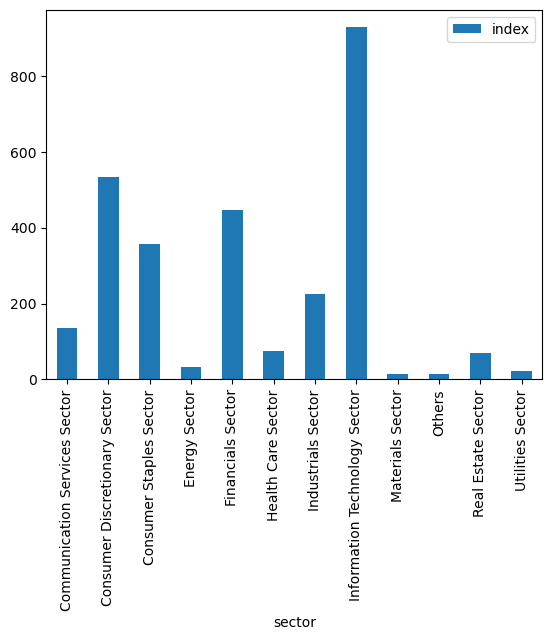

In [104]:
final_dataset['sector'].map(map_sector_to_gics).reset_index().groupby('sector').count().plot(kind='bar')

In [137]:
# Map the sector to gics using regex
final_dataset['sector'] = final_dataset['sector'].map(map_sector_to_gics)

“How often have I said to you that when you have eliminated the impossible, whatever remains, however improbable, must be the truth? *- Sherlock Holmes*”

- Founders column - Handling missing values
    - The dataset had 544 missing values for the founders, the missing values in the founder column may be filled with Unknown.

In [138]:
def unique_known_unknown(column):
    """Prints the unique, known and unknown values of a column"""
    name    = column.name
    unique  = len(column.unique())
    unknown = column.isna().sum()
    known   = len(column) - unknown
    
    print(f'The {name} column had {known} known {name}, {unique} unique {name} and {unknown} unknown or missing values for {name}.')

In [139]:
founders = final_dataset['founders']

unique_known_unknown(founders)

The founders column had 2312 known founders, 1970 unique founders and 544 unknown or missing values for founders.


In [140]:
# Fill NaN values in founders column with Unknown
founders.fillna('Unknown', inplace=True)

In [141]:
def top(df, col_name, n):
    """
    Returns the top n value counts of a column, excluding the 'Unknown' index.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    col_name (str): The name of the column to analyze.
    n (int): The number of top value counts to return.
    
    Returns:
    Series: The top n value counts of the column.
    """
    series = df.groupby(col_name)[col_name].count()
    if 'Unknown' in series.index:
        n += 1
    top_values = series.nlargest(n).drop('Unknown', errors='ignore')
    return top_values

In [142]:
top_founders = top(final_dataset, 'founders', 7)
top_founders

founders
Ashneer Grover, Shashvat Nakrani          7
Byju Raveendran                           6
Byju Raveendran, Divya Gokulnath          6
Bhavish Aggarwal                          5
Falguni Nayar                             5
Ritesh Agarwal                            5
Sai Srinivas Kiran G, Shubham Malhotra    5
Name: founders, dtype: int64

In [143]:
print("The top 7 known startup founders in India are:")
print('\n'.join(top_founders.index))


The top 7 known startup founders in India are:
Ashneer Grover, Shashvat Nakrani
Byju Raveendran
Byju Raveendran, Divya Gokulnath
Bhavish Aggarwal
Falguni Nayar
Ritesh Agarwal
Sai Srinivas Kiran G, Shubham Malhotra


In [144]:
# final_dataset.drop('founders', axis=1, inplace=True) 

- Investor column - Handling missing values
    - Calculate the mode for each sector in the 'investor' column
    - Fill missing values in the 'investor' column with the calculated mode per sector

In [145]:
investors = final_dataset['investor']

unique_known_unknown(investors)

The investor column had 2228 known investor, 1731 unique investor and 628 unknown or missing values for investor.


In [146]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")

# Fill missing values in the 'investor' column with the calculated mode per sector
investors.fillna(mode_per_sector, inplace=True)



In [147]:
print(f"Now, there are {investors.isna().sum()} missing values in investor column")

Now, there are 0 missing values in investor column


In [148]:
top_investors = top(final_dataset, 'investor', 3)
top_investors

investor
Venture Catalysts            323
Inflection Point Ventures    224
Angel investors               68
Name: investor, dtype: int64

In [149]:
print("The top 3 known startup investors in India are:")
print('\n'.join(top_investors.index))

The top 3 known startup investors in India are:
Venture Catalysts
Inflection Point Ventures
Angel investors


- Stage column -  Handling missing values
    - Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

*Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown*

In [150]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


In [151]:
final_dataset['stage'].unique()

array(['Venture - Series Unknown', 'Pre-seed', 'Seed', 'Pre-series A',
       'Pre-series', 'Series C', 'Series A', 'Series B', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Edge', 'Series H', 'Seed A',
       'Series A-1', 'Seed Funding', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Angel Round', 'Pre series A1',
       'Series E2', 'Bridge Round', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Series F2', 'Series G', 'Series B3',
       'PE', 'Series F1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Fresh funding', 'Post series A', 'Seed fund', 'Angel',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Corporate Round', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

- Insight for grouping startup stages was drawn from [stripe's stages of a startup](https://stripe.com/resources/more/what-are-the-stages-of-a-startup)

In [152]:
startup_stages = {
    "Pre-seed": [
        "Pre-seed",
        "Pre-seed Round",
        "Pre-seed Investment",
    ],
    "Seed": [
        "Early seed",
        "Seed",
        "Seed A",
        "Seed round",
        "Seed Round & Series A",
        "Seed Funding",
        "Fresh funding",
        "Seed Investment",
        "Angel Round",
        "Angel",
        "Angel Investment",
        "Angel Funding",
        'Funding Round'
    ],
    "Early stage": [
        "Pre-series A",
        "Pre-series",
        "Pre-series C",
        "Pre-series B",
        "Pre series A1",        
        "Seies A",
        'Series A-1',
        "Series A2",
        'Series A',
        'Post series A', 
        'Series B',
        'Series B2',
        'Series B3'
    ],
    "Late stage": [
        "Series C",
        "Series C, D",
        "Series D",
        "Series D1",
        "Series E",
        "Series E2",
        "Series F",
        "Series F1",
        "Series F2",
        "Series G",
        "Series H",
        "Series I",
        "Mid series"
    ],
    "Exit stage": [
        "Post-IPO Debt",
        "Post-IPO Equity",
        "Secondary Market",
        "Acquisition",
        "IPO (Initial Public Offering)",
        "Debt",
        "Bridge",
        "Edge",
        "Private Equity",
        "PE",
        "Grant",
        "Debt Financing",
        "Corporate Round",        
        "Non-equity Assistance"
    ]
}


In [153]:
# Function to map stage to 5 startup stages
def map_stage_to_fivestages(stage):
    for five_stage, stages in startup_stages.items():
        # Constructing the pattern using '.*' to match any characters
        pattern = '|'.join(f'.*{re.escape(s)}.*' for s in stages)
        # Compile the regex pattern with IGNORECASE flag
        pattern = re.compile(pattern, re.IGNORECASE)
        if re.search(pattern, stage):
            return five_stage # If the sector belongs to one of the five stages
    return stage  # If the stage doesn't belong to any of the five stages

In [154]:
# Map the stage to five stages using regex
final_dataset['stage'] = final_dataset['stage'].apply(map_stage_to_fivestages)

In [155]:
print(f"Now, there are {final_dataset['stage'].isna().sum()} missing values in stage column. And the stage column has been classified into 5 major startup stages.")


Now, there are 0 missing values in stage column. And the stage column has been classified into 5 major startup stages.


- Amount column - Handling missing values
    - Calculate the median amount by seed stage
    - Missing values will be filled based on the median amount by stage

In [156]:
amount = final_dataset['amount($)']
print(f"There are {amount.isna().sum()} missing values in the 'amount($)' column")

There are 554 missing values in the 'amount($)' column


In [157]:
# Calculate the median amount($) grouped by stage values
median_per_stage = final_dataset.groupby('stage')['amount($)'].median()

# Calculate the overall median of median_per_stage
overall_median_per_stage = median_per_stage.median()

# Fill NaN values in median_per_stage with the overall median of median_per_stage
median_per_stage.fillna(overall_median_per_stage, inplace=True)

# Fill missing values in the 'amount($)' column with the calculated median per stage
amount.fillna(final_dataset['stage'].map(median_per_stage), inplace=True)



In [158]:
print(f"Now, there are {amount.isna().sum()} missing values in the 'amount($)' column")

Now, there are 0 missing values in the 'amount($)' column


In [159]:
final_dataset.columns

Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount($)', 'stage', 'year'],
      dtype='object')

In [160]:
final_dataset.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
what_it_does     0
founders         0
investor         0
amount($)        0
stage            0
year             0
dtype: int64

- The final_dataset has been successfully cleaned and missing values has been strategically filled. The next step is a little house keeping to drop any duplicated rows.

##### Again Drop duplicated rows in final data set

In [161]:
# Again Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

### Save datasets as flat files

In [113]:
# Dataset from Microsoft SQL database
first_dataset.to_csv('datasets/individual_csv/startup_funding2020-2021.csv')

In [114]:
# Final merged dataset with cleaned column names and cleaned amount values
final_dataset.to_csv('datasets/final_csv/startup_funding2018-2021.csv')

## Hypothesis Testing
**Null Hypothesis(Ho):** There is no siginificant difference in the amount of funding received by startups with headquarter in Bangalore compared to startups in other areas.

**Alternative Hypothesis(Ha):** There is a siginificantdifference in the amount of funding received by startups with headquarter in Bangalore compared to startups in other areas.

### T-Test

In [ ]:
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

In [ ]:
t,p =stats.ttest_ind(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'])
print(f't-value:{t}')
print(f'p-value:{p}')

t-value:nan
p-value:nan


In [ ]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no significant difference in the amount of funding received by startups with headquarter in Bangalore compared to startups in other areas.")
else:
   print("We failed to reject the null hypothesis. There is a significant difference in the amount of funding received by startups with headquarter in Bangalore compared to startups in other areas.")

We failed to reject the null hypothesis. There is a significant difference in the amount of funding received by startups with headquarter in Bangalore compared to startups in other areas.


In [ ]:
final_dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_brand,2856,2133,Byju's,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,2856.0,NaN,NaN,NaN,2016.039566,3.73653,1963.0,2015.0,2016.0,2018.0,2021.0
headquarter,2856,113,Bengaluru,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,2856,12,Information Technology Sector,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,2856,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,2856,1969,Unknown,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,2856,1729,Venture Catalysts,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount($),2856.0,NaN,NaN,NaN,98511867.646215,3097961270.10968,878.94,937536.0,3112145.0,8046487.5,150000000000.0
stage,2856,6,Venture - Series Unknown,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2856.0,NaN,NaN,NaN,2020.017857,1.087759,2018.0,2020.0,2020.0,2021.0,2021.0


- Business question
    - What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

In [ ]:
final_dataset.head()

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
0,Aqgromalin,2019.0,Chennai,Materials Sector,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Venture - Series Unknown,2020
1,Krayonnz,2019.0,Bengaluru,Information Technology Sector,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Energy Sector,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,330000.0,Pre-seed,2020
3,NCOME,2020.0,Delhi,Industrials Sector,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Venture - Series Unknown,2020
4,Gramophone,2016.0,Indore,Materials Sector,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Venture - Series Unknown,2020


In [ ]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2856,2856.000000,2856,2856,2856,2856,2856,2.856000e+03,2856,2856.000000
unique,2133,NaN,113,12,2691,1969,1729,NaN,6,NaN
top,Byju's,NaN,Bengaluru,Information Technology Sector,BYJU'S is an educational technology company th...,Unknown,Venture Catalysts,NaN,Venture - Series Unknown,NaN
freq,11,NaN,949,943,5,544,305,NaN,970,NaN
mean,NaN,2016.039566,NaN,NaN,NaN,NaN,NaN,9.851187e+07,NaN,2020.017857
std,NaN,3.736530,NaN,NaN,NaN,NaN,NaN,3.097961e+09,NaN,1.087759
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,9.375360e+05,NaN,2020.000000
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.112145e+06,NaN,2020.000000
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,8.046488e+06,NaN,2021.000000


The provided descriptive statistics offer insights into the dataset across the following attributes:

1. **Company Brand**:
   - There are 2,133 unique company brands in the dataset, with "Byju's" being the most frequently occurring brand (appearing 11 times).
   
2. **Founded**:
   - Companies in the dataset were founded between 1963 and 2021.
   - The mean founding year is approximately 2016.04, with a standard deviation of 3.74 years.
   
3. **Headquarter**:
   - Bangalore is the most common headquarters location, appearing 886 times.
   
4. **Sector**:
   - There are 137 unique sectors represented in the dataset, with "FinTech" being the most common (appearing 262 times).
   
5. **What It Does**:
   - There are 2,691 unique descriptions of what companies do, with the most frequent description being related to educational technology.
   
6. **Founders**:
   - "Unknown" founders appear most frequently (544 times).
   
7. **Investor**:
   - "Unknown" investors appear most frequently (80 times).
   
8. **Amount($)**:
   - The investment amounts range from $720 to $150 billion.
   - The mean investment amount is approximately $98.53 million, with a standard deviation of $3.10 billion.
   
9. **Stage**:
   - There are 54 unique stages of investment, with "Venture - Series Unknown" being the most common.
   
10. **Year**:
    - Companies in the dataset span from the year 2018 to 2021.
    - The median year is 2020, with 25%, 50%, and 75% quartiles also in 2020.

These descriptive statistics provide a summary of the dataset's key attributes, offering insights into the distribution and characteristics of the data.

In [ ]:
final_dataset.groupby('headquarter')['headquarter'].count().nlargest(10)

headquarter
Bengaluru    949
Mumbai       489
Delhi        337
Gurugram     337
Chennai      110
Pune         105
Noida         90
Hyderabad     82
Ahmedabad     39
Jaipur        32
Name: headquarter, dtype: int64

In [ ]:
final_dataset.groupby('headquarter')['amount($)'].sum().nlargest(10)

headquarter
Mumbai        2.319047e+11
Bengaluru     2.514675e+10
Gurugram      7.497587e+09
Delhi         4.699251e+09
California    3.079238e+09
Pune          1.467782e+09
Chennai       1.203514e+09
Haryana       9.388076e+08
Noida         6.938761e+08
Jaipur        6.039755e+08
Name: amount($), dtype: float64

In [ ]:
final_dataset.columns

Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount($)', 'stage', 'year'],
      dtype='object')

In [ ]:
fig = px.scatter(final_dataset.query("year==2020"), x="year", y="amount($)",
	         size=None, color="headquarter",
                 hover_name="headquarter", log_x=True, size_max=60)
fig.show()

In [ ]:
# Univariate Visualizations

# Histogram of Founded Year
fig = px.histogram(final_dataset, x='founded', nbins=20, title='Distribution of Founded Year')
fig.update_layout(xaxis_title='Founded Year', yaxis_title='Frequency')
fig.show()

In [ ]:
# Bar Chart of Headquarters
headquarter_counts = final_dataset['headquarter'].value_counts().reset_index()
headquarter_counts.columns = ['Headquarter', 'Count']
fig = px.bar(headquarter_counts, x='Headquarter', y='Count', title='Number of Companies by Headquarters')
fig.update_layout(xaxis_title='Headquarters', yaxis_title='Number of Companies')
fig.show()

In [ ]:
# Histogram of Investment Amounts
fig = px.histogram(final_dataset, x='amount($)', nbins=20, title='Distribution of Investment Amounts')
fig.update_layout(xaxis_title='Investment Amount ($)', yaxis_title='Frequency')
fig.show()

In [ ]:
# Bar Chart of Sectors
sector_counts = final_dataset['sector'].value_counts().nlargest(10).sort_values(ascending=True).reset_index()
sector_counts.columns = ['Sector', 'Count']
fig = px.bar(sector_counts, x='Count', y='Sector', orientation='h', title='Top 10 Sectors by Number of Companies')
fig.update_layout(xaxis_title='Number of Companies', yaxis_title='Sector')
fig.show()

#### Bivariate Visualizations

In [ ]:
# Bivariate Visualizations

# Scatter Plot of Investment Amounts vs. Founded Year
fig = px.scatter(final_dataset, x='founded', y='amount($)', title='Investment Amounts vs. Founded Year')
fig.update_layout(xaxis_title='Founded Year', yaxis_title='Investment Amount ($)')
fig.show()

In [ ]:
# Box Plot of Investment Amounts by Sector
fig = px.box(final_dataset, x='sector', y='amount($)', title='Investment Amounts by Sector')
fig.update_layout(xaxis_title='Sector', yaxis_title='Investment Amount ($)')
fig.show()

In [ ]:
# Clustered Bar Chart of Investment Amounts by Headquarters
headquarter_investment = final_dataset.groupby('headquarter')['amount($)'].sum().nlargest(10).reset_index()
fig = px.bar(headquarter_investment, x='headquarter', y='amount($)', title='Total Investment Amounts by Headquarters- Top 10 Sectors')
fig.update_layout(xaxis_title='Headquarters', yaxis_title='Total Investment Amount ($)')
fig.show()

In [ ]:
# Aggregate investment amounts by sector
sector_investment = final_dataset.groupby('sector')['amount($)'].sum().reset_index()

# Select the top 10 sectors by investment amount
top_10_sectors = sector_investment.nlargest(10, 'amount($)')

# Stacked Bar Chart of Investment Amounts by Stage and Sector for the top 10 sectors
fig = px.bar(final_dataset[final_dataset['sector'].isin(top_10_sectors['sector'])], 
             x='sector', y='amount($)', color='stage', 
             title='Total Investment Amounts by Stage and Sector (Top 10 Sectors)', 
             barmode='stack')
fig.update_layout(xaxis_title='Sector', yaxis_title='Total Investment Amount ($)')
fig.show()


In [ ]:

# Bubble Chart to explore data
fig = px.scatter(final_dataset, x='founded', y='amount($)', 
                 size='amount($)', color='sector', hover_name='company_brand',
                 title='Bubble Chart: Founded Year vs Investment Amount by Sector',
                 labels={'founded': 'Founded Year', 'amount($)': 'Investment Amount ($)'},
                 size_max=150)
fig.show()




1. **Mumbai**:
   - Mumbai, with a remarkable $231.41 billion in investment, stands as the financial capital of India, boasting a thriving startup ecosystem primarily focused on finance, fintech, and media sectors.
   - The city's connectivity, access to capital markets, presence of major financial institutions, and a diverse talent pool contribute to its prominence.
   - Mumbai also benefits from its proximity to affluent consumer markets, making it attractive for startups in consumer goods and services.

2. **Bangalore**:
   - Bangalore, with a significant investment of $25.91 billion, has long been considered the Silicon Valley of India and is one of the leading startup hubs not only in India but globally.
   - The city's robust ecosystem comprises top-notch educational institutions like IITs and IIMs, a large pool of skilled tech talent, supportive government policies, presence of venture capital firms, and a vibrant culture of innovation and entrepreneurship.
   - It's particularly dominant in sectors like technology (IT, software development, AI, etc.), EdTech, and HealthTech.

3. **Gurugram**:
   - Gurugram has attracted a substantial investment of $5.70 billion, emerging as a significant hub for startups in India.
   - The city's strategic location, proximity to the national capital, and growing infrastructure contribute to its prominence in the startup ecosystem.

4. **New Delhi**:
   - New Delhi, with an investment of $3.56 billion, is part of the Delhi-NCR region and has seen significant growth in startup activity, particularly in sectors like e-commerce, logistics, and SaaS.
   - Its proximity to the national capital provides access to government institutions and policies, while also being close to major ports and airports, facilitating easy logistics.

5. **Pune**:
   - Pune, with an investment of $1.48 billion, has emerged as a hub for technology startups, particularly in IT services, automotive, and manufacturing sectors.
   - Factors contributing to its prominence include the presence of top engineering colleges, a favorable climate for innovation, and a lower cost of living compared to cities like Mumbai and Bangalore.

6. **Gurgaon**:
   - Gurgaon, with an investment of $1.44 billion, is another significant player in the startup ecosystem, particularly in the Delhi-NCR region.
   - Its proximity to the national capital and growing infrastructure make it an attractive destination for startups across various sectors.

7. **Chennai**:
   - Chennai, attracting $1.22 billion in investment, has a growing startup ecosystem with a focus on sectors like manufacturing, healthcare, and AgriTech.
   - Factors such as the presence of industrial clusters, research institutions like IIT Madras, and government initiatives to promote entrepreneurship contribute to its prominence.

8. **Delhi**:
   - Delhi, with an investment of $993.05 million, is a vital part of the Delhi-NCR region and has witnessed significant startup activity across various sectors.
   - Its strategic location, coupled with access to government institutions and policies, makes it an attractive destination for startups looking to establish themselves in the Indian market.

Made with 💖 [Gabriel Okundaye](https://www.linkedin.com/in/dr-gabriel-okundaye)
<span style="color: #aaaaaa;">Blood and sweat</span>
